In [113]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [114]:
df=pd.read_excel('originData.xlsx')

In [115]:
X=df[['S','K']]

In [116]:
y=df['Correct or Not']
# y[y=='None']=0
# y[y=='Correct']=1
# y=y.values

In [117]:
import matplotlib.pyplot as plt
def svm_visual(x,y,svm_clf,labels):
    h=0.002
    x_min, x_max = x.min() - 0.2, x.max() + 0.2
    y_min, y_max = y.min() - 0.2, y.max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max,h),np.arange(y_min, y_max,h))
    Z=svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.ocean, alpha=0.2)
    colors = ['#FF0000', '#FFA500']
    print(label)
    c= [colors[int(label)] for label in labels]
    plt.scatter(x,y,c=c)

In [111]:
X

,S,K
0,0.609514,0.577964
1,1.968076,6.964320
2,3.264920,11.708941
3,2.040696,6.255319
4,2.594648,9.999340
...,...,...
147,0.400391,0.603311
148,0.242425,0.395125
149,0.381609,0.222413
150,0.407512,0.395322


In [118]:
y

0         None
1         None
2         None
3         None
4         None
        ...   
147    Correct
148       None
149       None
150    Correct
151    Correct
Name: Correct or Not, Length: 152, dtype: object

In [119]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

p_s_c=Pipeline([
    ('poly_features',PolynomialFeatures(degree=3)),
    ('scaler',StandardScaler()),
    ('svm_clf',LinearSVC(C=10,loss='hinge'))
])
p_s_c.fit(X,y)

/Users/chenxia/miniforge3/envs/tf2/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

/Users/chenxia/miniforge3/envs/tf2/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


ValueError: could not convert string to float: 'None'

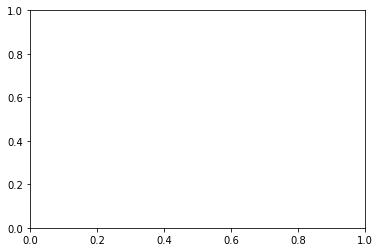

In [120]:
svm_visual(X['S'].values,X['K'].values,p_s_c,y)

In [121]:
p_s_c.predict([1,1])

/Users/chenxia/miniforge3/envs/tf2/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.